<a href="https://colab.research.google.com/github/joaomigueld3/natural-language-processing/blob/main/PLN_Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install pandas numpy spacy scikit-learn matplotlib seaborn


In [44]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# df = pd.read_csv('/content/drive/MyDrive/DatasetsColab/movies_overview.csv')
df = pd.read_csv('/content/drive/MyDrive/DatasetsColab/movies_overview.csv', sep=",", header=0)


In [35]:
# Visualizing first lines
print(df.head())

                      title  \
0  The Shawshank Redemption   
1             The Godfather   
2     The Godfather Part II   
3          Schindler's List   
4              12 Angry Men   

                                            overview        genre_ids  
0  Imprisoned in the 1940s for the double murder ...         [18, 80]  
1  Spanning the years 1945 to 1955, a chronicle o...         [18, 80]  
2  In the continuing saga of the Corleone crime f...         [18, 80]  
3  The true story of how businessman Oskar Schind...  [18, 36, 10752]  
4  The defense and the prosecution have rested an...             [18]  


In [36]:
print(df.columns)  # List columns

Index(['title', 'overview', 'genre_ids'], dtype='object')


In [28]:
# Check about data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      9980 non-null   object
 1   overview   9980 non-null   object
 2   genre_ids  9980 non-null   object
dtypes: object(3)
memory usage: 234.0+ KB
None


In [24]:
# Descriptive Statistics
print(df.describe())

         title                                           overview genre_ids
count     9980                                               9980      9980
unique    9615                                               9971      2222
top     Return  Young businessman Thomas Crown is bored and de...      [18]
freq        13                                                  2       577


In [29]:
# Checking for Null Values
print(df.isnull().sum())

title        0
overview     0
genre_ids    0
dtype: int64


### Exploratory Data Analysis (EDA) - Análise Exploratória de Dados

In [37]:
# Remove spaces from column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['title', 'overview', 'genre_ids'], dtype='object')


title
Return                  13
The Killer               4
Pinocchio                4
Beauty and the Beast     4
Prey                     4
Name: count, dtype: int64


<ipython-input-38-5aecfac41de4>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


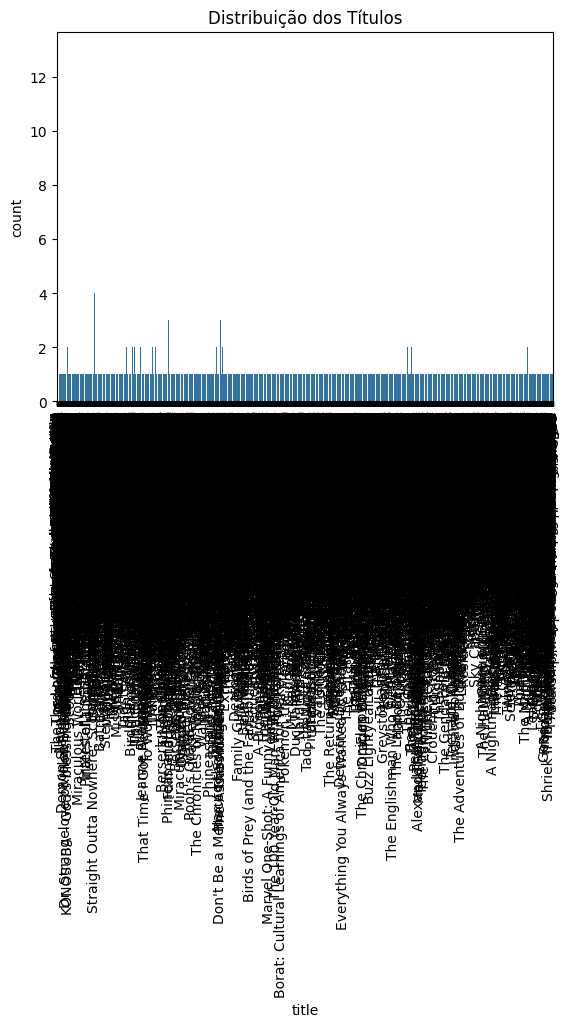

In [38]:
# Check for duplicate values
print(df['title'].value_counts().head())

# Example: count how many titles per genre
sns.countplot(x='title', data=df)
plt.title('Distribuição dos Títulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Preprocessing with SpaCy

In [41]:
# Baixar modelo do SpaCy para inglês
import spacy
nlp = spacy.load('en_core_web_sm')

# Função para pré-processamento
def preprocess(text):
    doc = nlp(text.lower())  # Converter para minúsculas
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop])

# Aplicar pré-processamento ao dataset
df["text_processed"] = df["overview"].apply(preprocess)

# Visualizar os dados processados
print(df[["overview", "text_processed"]].head())


                                            overview  \
0  Imprisoned in the 1940s for the double murder ...   
1  Spanning the years 1945 to 1955, a chronicle o...   
2  In the continuing saga of the Corleone crime f...   
3  The true story of how businessman Oskar Schind...   
4  The defense and the prosecution have rested an...   

                                      text_processed  
0  imprison 1940 double murder wife lover upstand...  
1  span year 1945 1955 chronicle fictional italia...  
2  continue saga corleone crime family young vito...  
3  true story businessman oskar schindler save th...  
4  defense prosecution rest jury file jury room d...  


## Convert text to TF-IDF vectors

In [48]:
# Criar o vetor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limita para 5000 palavras mais relevantes
X = vectorizer.fit_transform(df["text_processed"])

# Converter os rótulos em valores numéricos
y = df["title"]

# Exibir algumas palavras do vocabulário TF-IDF
print("Palavras no vocabulário:", vectorizer.get_feature_names_out()[:100])


Palavras no vocabulário: ['000' '10' '100' '11' '12' '13' '14' '15' '16' '16th' '17' '17th' '18'
 '1890s' '18th' '19' '1920s' '1930' '1930s' '1940' '1941' '1942' '1943'
 '1944' '1945' '1950' '1950s' '1957' '1959' '1960' '1962' '1963' '1964'
 '1965' '1967' '1969' '1970' '1970s' '1971' '1972' '1973' '1976' '1977'
 '1978' '1979' '1980' '1980s' '1984' '1987' '1988' '1990' '1991' '1999'
 '19th' '20' '200' '2008' '2009' '20th' '21' '21st' '22' '23' '24' '25'
 '26' '27' '28' '30' '300' '35' '40' '400' '47' '50' '500' '60' '70' '80'
 '90' 'aaron' 'abandon' 'abby' 'abduct' 'abduction' 'ability' 'able'
 'aboard' 'abroad' 'abruptly' 'absence' 'absent' 'absorb' 'abuse'
 'abusive' 'academic' 'academy' 'accept' 'access' 'accident']


In [53]:
# Imprime a representação TF-IDF do corpus
print("Matriz TF-IDF:")
print(X.toarray())

Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
num_palavras = len(vectorizer.get_feature_names_out())
print(num_palavras)

5000


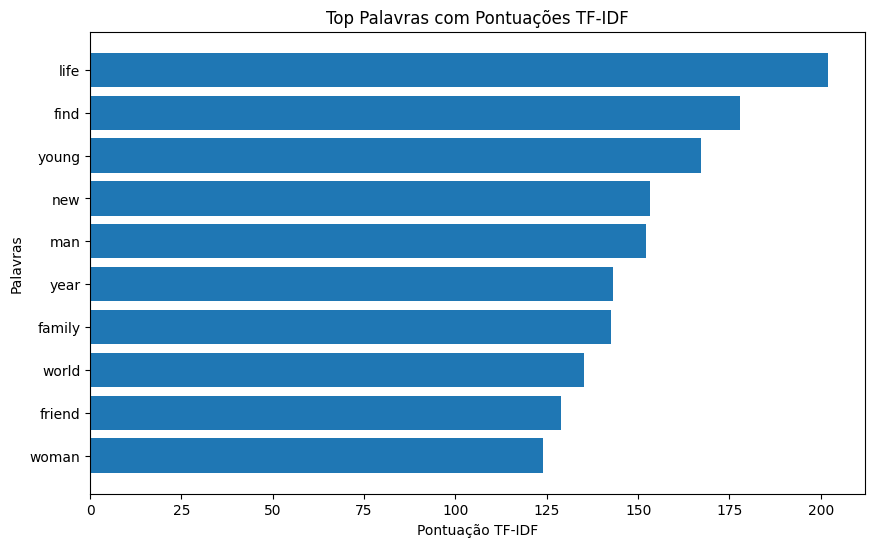

In [55]:
import numpy as np  # Certifique-se de importar numpy
import matplotlib.pyplot as plt

# Visualizar os valores TF-IDF
# Vamos identificar as palavras mais relevantes do corpus usando TF-IDF
def plot_tfidf(matrix, feature_names, top_n=10):
    # Calcula a soma das pontuações TF-IDF para cada palavra
    tfidf_sums = np.array(matrix.sum(axis=0)).flatten()
    top_indices = tfidf_sums.argsort()[-top_n:][::-1]

    # Palavras mais relevantes
    top_words = [feature_names[i] for i in top_indices]
    top_scores = tfidf_sums[top_indices]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_scores, align='center')
    plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar os scores em ordem decrescente
    plt.title("Top Palavras com Pontuações TF-IDF")
    plt.xlabel("Pontuação TF-IDF")
    plt.ylabel("Palavras")
    plt.show()

# Visualizar palavras mais relevantes no corpus
plot_tfidf(X, vectorizer.get_feature_names_out(), top_n=10)

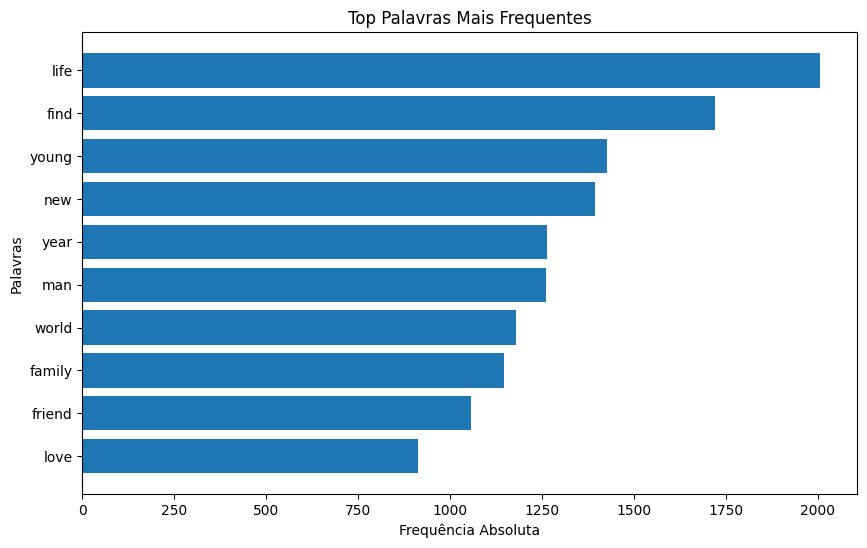

In [58]:
from collections import Counter
import matplotlib.pyplot as plt

# Função para contar as palavras mais frequentes no corpus
def plot_word_frequency(corpus_processed, top_n=10):
    # Unir todos os documentos do corpus em um único texto
    all_words = " ".join(corpus_processed).split()

    # Contar a frequência de cada palavra
    word_counts = Counter(all_words)

    # Selecionar as palavras mais frequentes
    most_common = word_counts.most_common(top_n)
    top_words = [word for word, count in most_common]
    top_counts = [count for word, count in most_common]

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_counts, align='center')
    plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar as palavras em ordem decrescente
    plt.title("Top Palavras Mais Frequentes")
    plt.xlabel("Frequência Absoluta")
    plt.ylabel("Palavras")
    plt.show()

# Chamando a função para exibir as palavras mais frequentes
plot_word_frequency(df["text_processed"], top_n=10)

## Split Data for Training and Testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (7984, 5000)
Tamanho do conjunto de teste: (1996, 5000)


## Training a Machine Learning Model


In [ ]:
# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


Acurácia: 0.001002004008016032

Relatório de Classificação:
                                                                           precision    recall  f1-score   support

                                                  ...And Justice for All       0.00      0.00      0.00         1
                                                                10 Years       0.00      0.00      0.00         1
                                                                   11:14       0.00      0.00      0.00         1
                                                               12 Strong       0.00      0.00      0.00         1
                                                               16 Blocks       0.00      0.00      0.00         1
                                                                     1BR       0.00      0.00      0.00         1
                                                                    2010       0.00      0.00      0.00         1
                          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Making Predictions with the Trained Model

In [ ]:
# Novos exemplos para teste
new_texts = ["I love this movie!", "This is the worst experience I've had."]

# Pré-processar os novos textos
new_texts_processed = [preprocess(text) for text in new_texts]

# Transformar com TF-IDF
new_X = vectorizer.transform(new_texts_processed)

# Fazer a previsão
predictions = model.predict(new_X)

# Exibir resultados
for text, label in zip(new_texts, predictions):
    print(f"Texto: {text} -> Predição: {label}")
